Mohammad Dehghan Rouzi (810197243)
import section

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

''' Load oil data'''

In [2]:
df_oil = pd.read_csv('Oil.csv')
df_oil.columns = ['Date_oil', 'Price_oil']
print(df_oil)

       Date_oil  Price_oil
0     5/20/1987      18.63
1     5/21/1987      18.45
2     5/22/1987      18.55
3     5/25/1987      18.60
4     5/26/1987      18.63
...         ...        ...
8206  9/17/2019      65.59
8207  9/18/2019      64.29
8208  9/19/2019      64.25
8209  9/20/2019      65.23
8210  9/23/2019      64.66

[8211 rows x 2 columns]


''' Load gold data''' (xlrd data is needed)

In [3]:
gold_price = pd.ExcelFile('Gold.xlsx')
df_gold = gold_price.parse("Daily", skiprows=8, usecols=range(3, 5))
df_gold.columns = ['Date_gold', 'Price_gold']
print(df_gold)

       Date_gold  Price_gold
0     1978-12-29      226.00
1     1979-01-01      226.00
2     1979-01-02      226.80
3     1979-01-03      218.60
4     1979-01-04      223.15
...          ...         ...
10621 2019-09-16     1497.20
10622 2019-09-17     1502.10
10623 2019-09-18     1503.50
10624 2019-09-19     1500.70
10625 2019-09-20     1501.90

[10626 rows x 2 columns]


''' Convert to pandas datetime '''

In [4]:
df_oil['Date_oil'] = pd.to_datetime(df_oil['Date_oil'], errors='coerce')
df_oil = df_oil.resample('M', on='Date_oil').mean()
df_oil = df_oil.reset_index()
print(df_oil)

df_gold['Date_gold'] = pd.to_datetime(df_gold['Date_gold'], errors='coerce')
df_gold = df_gold.resample('M', on='Date_gold').mean()
df_gold = df_gold.reset_index()
print(df_gold)

      Date_oil  Price_oil
0   1987-05-31  18.580000
1   1987-06-30  18.860476
2   1987-07-31  19.856522
3   1987-08-31  18.979524
4   1987-09-30  18.313182
..         ...        ...
384 2019-05-31  71.317727
385 2019-06-30  64.220500
386 2019-07-31  63.919130
387 2019-08-31  59.041818
388 2019-09-30  62.954375

[389 rows x 2 columns]
     Date_gold   Price_gold
0   1978-12-31   226.000000
1   1979-01-31   227.215217
2   1979-02-28   245.670000
3   1979-03-31   242.047727
4   1979-04-30   238.664286
..         ...          ...
485 2019-05-31  1283.650000
486 2019-06-30  1359.042500
487 2019-07-31  1412.978261
488 2019-08-31  1499.025000
489 2019-09-30  1512.300000

[490 rows x 2 columns]


'''Merge cells'''

In [5]:
final_df = pd.merge(df_oil.assign(grouper_date=df_oil['Date_oil'].dt.to_period('M')),
                    df_gold.assign(grouper_date=df_gold['Date_gold'].dt.to_period('M')),
                    how='left', on='grouper_date')

print(final_df)

      Date_oil  Price_oil grouper_date  Date_gold   Price_gold
0   1987-05-31  18.580000      1987-05 1987-05-31   460.366667
1   1987-06-30  18.860476      1987-06 1987-06-30   449.590909
2   1987-07-31  19.856522      1987-07 1987-07-31   450.517391
3   1987-08-31  18.979524      1987-08 1987-08-31   460.778571
4   1987-09-30  18.313182      1987-09 1987-09-30   460.347727
..         ...        ...          ...        ...          ...
384 2019-05-31  71.317727      2019-05 2019-05-31  1283.650000
385 2019-06-30  64.220500      2019-06 2019-06-30  1359.042500
386 2019-07-31  63.919130      2019-07 2019-07-31  1412.978261
387 2019-08-31  59.041818      2019-08 2019-08-31  1499.025000
388 2019-09-30  62.954375      2019-09 2019-09-30  1512.300000

[389 rows x 5 columns]


''' remove rows belong to 1987 '''

In [6]:
final_df = final_df.iloc[8:]
# final_df = final_df.drop(final_df.index[:3], inplace=True)
print(final_df)

      Date_oil  Price_oil grouper_date  Date_gold   Price_gold
8   1988-01-31  16.749444      1988-01 1988-01-31   476.938095
9   1988-02-29  15.729524      1988-02 1988-02-29   442.073810
10  1988-03-31  14.731304      1988-03 1988-03-31   443.606522
11  1988-04-30  16.595263      1988-04 1988-04-30   452.061905
12  1988-05-31  16.314091      1988-05 1988-05-31   451.015909
..         ...        ...          ...        ...          ...
384 2019-05-31  71.317727      2019-05 2019-05-31  1283.650000
385 2019-06-30  64.220500      2019-06 2019-06-30  1359.042500
386 2019-07-31  63.919130      2019-07 2019-07-31  1412.978261
387 2019-08-31  59.041818      2019-08 2019-08-31  1499.025000
388 2019-09-30  62.954375      2019-09 2019-09-30  1512.300000

[381 rows x 5 columns]


''' show results '''

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


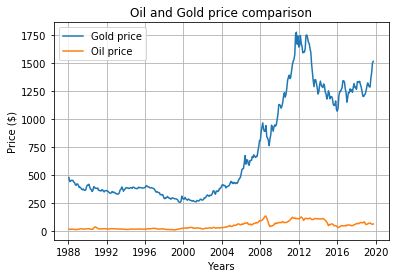

In [7]:
plt.plot(final_df['Date_oil'], final_df['Price_gold'], label='Gold price')
plt.plot(final_df['Date_oil'], final_df['Price_oil'], label='Oil price')
plt.legend()
plt.grid(True)
plt.xlabel('Years')
plt.ylabel('Price ($)')
plt.title('Oil and Gold price comparison')


plt.show()